# Roman Yakymiv KN-410 #13

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
from IPython.display import Image
from scipy.signal import convolve2d
import pylab as pl

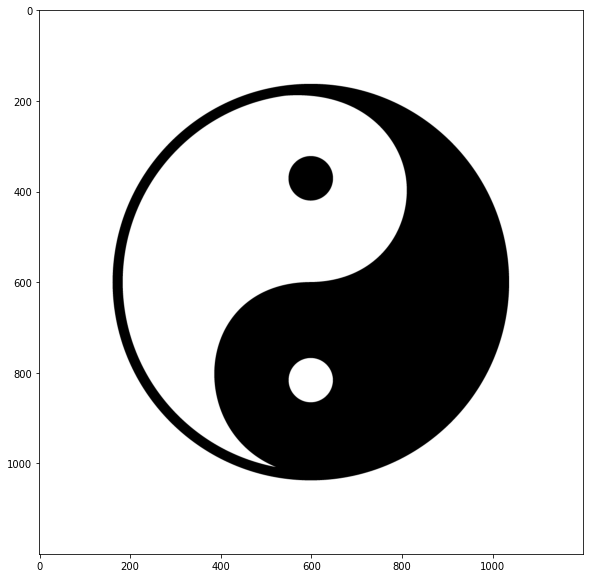

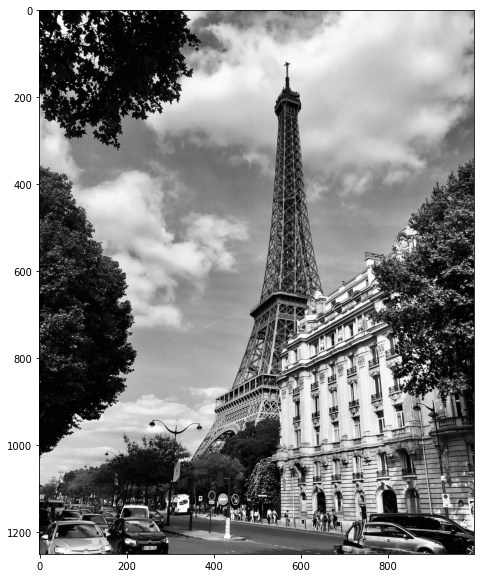

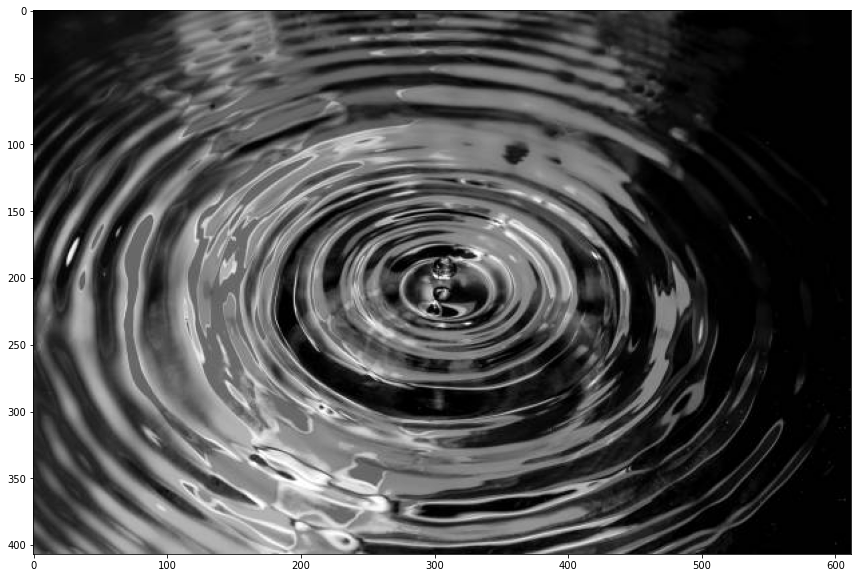

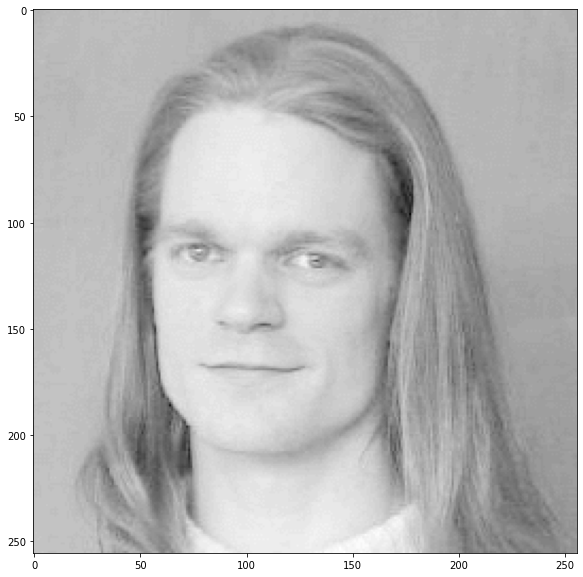

In [9]:
path = '/Users/ry/Downloads/CV_Lab1_img/'
image_names = ['yin-yang-symbol.jpg','paris.jpg', 'ripple.jpg', 'joe.png']
images = []

for name in image_names:
    images.append(cv2.imread(path+name, 0))
    
for img in images:
    plt.figure(figsize=(20,10))
    plt.imshow(img, cmap="gray")

# Sobel

In [10]:
def sobel_edge_detection_(image, verbose=False):
    fig = plt.figure(figsize=(25, 15))

    ax0 = fig.add_subplot(2,2,1) 
    
    if verbose:
      ax0.imshow(image, cmap='gray')
      ax0.set_title("Original")


    mask_x = pl.array([ [ - 1 , 0 ,  1 ], [ - 2 , 0 ,  2 ], [ - 1 , 0 ,  1 ] ])
    mask_y = pl.array([ [ - 1 , - 2 , - 1 ],[ 0 ,   0 ,   0 ], [  1 ,  2 ,  1 ] ])

    new_image_x = convolve2d(image, mask_x, mode='valid')

    ax1 = fig.add_subplot(2,2,2) 
    if verbose:
        ax1.imshow(new_image_x, cmap='gray')
        ax1.set_title("Horizontal Edge")

    new_image_y = convolve2d(image, mask_y, mode='valid')

    ax2 = fig.add_subplot(2,2,3) 
    if verbose:
        ax2.imshow(new_image_y, cmap='gray')
        ax2.set_title("Vertical Edge")

    gradient_magnitude = pl.sqrt(pl.square(new_image_x) + pl.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    ax3 = fig.add_subplot(2,2,4) 
    if verbose:
        ax3.imshow(gradient_magnitude, cmap='gray')
        ax3.set_title("Sobel")
        plt.show()

    return gradient_magnitude

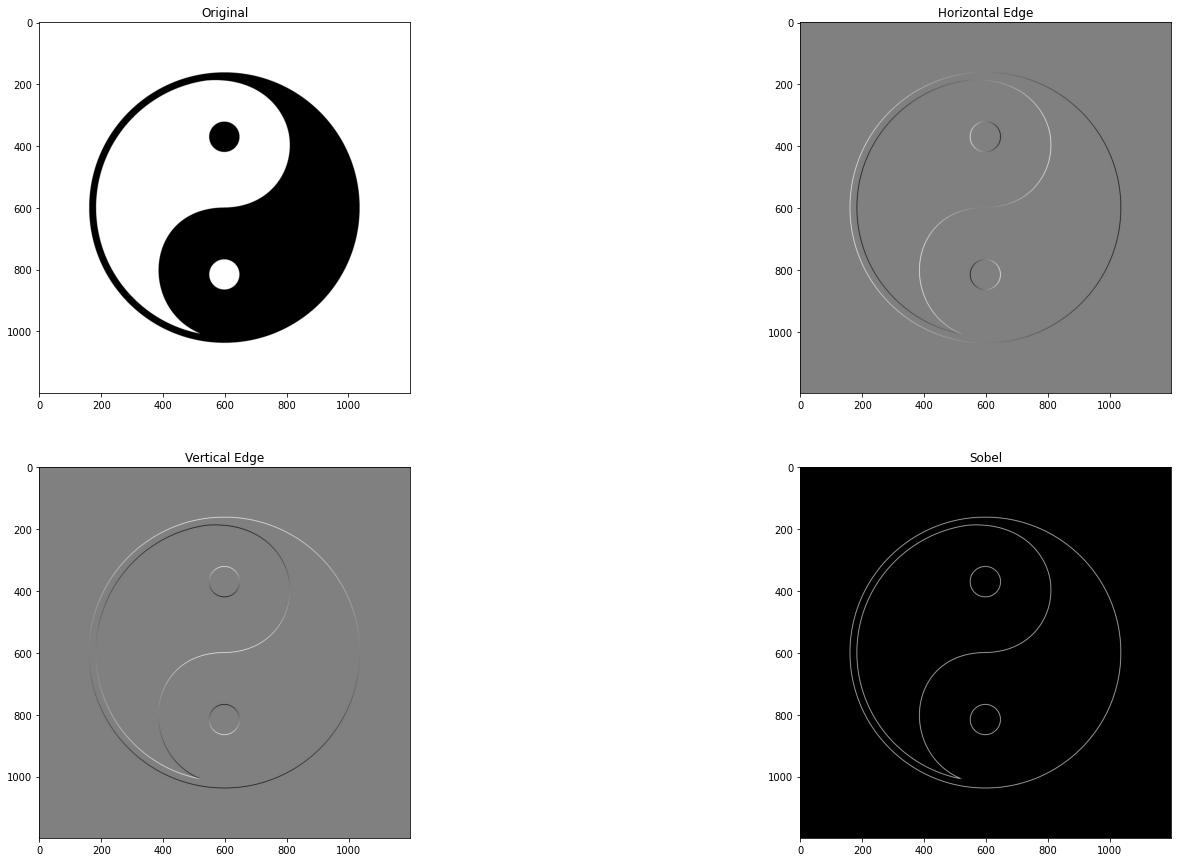

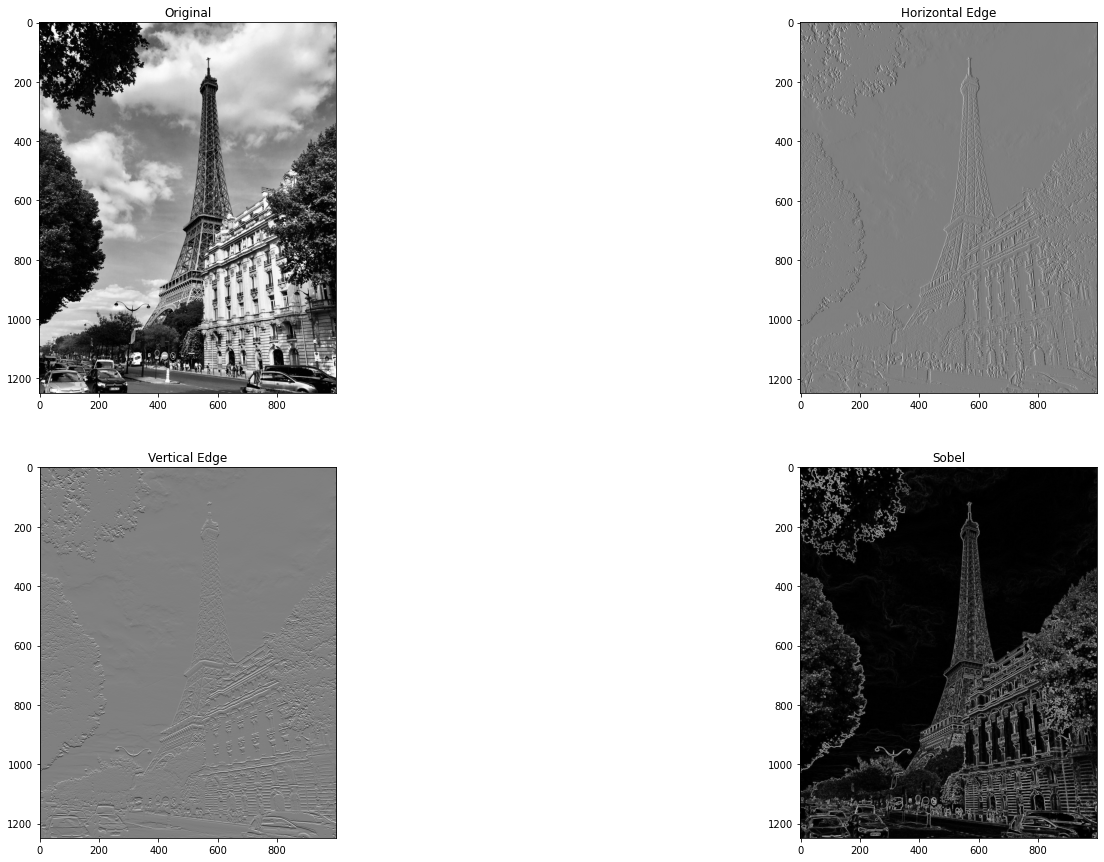

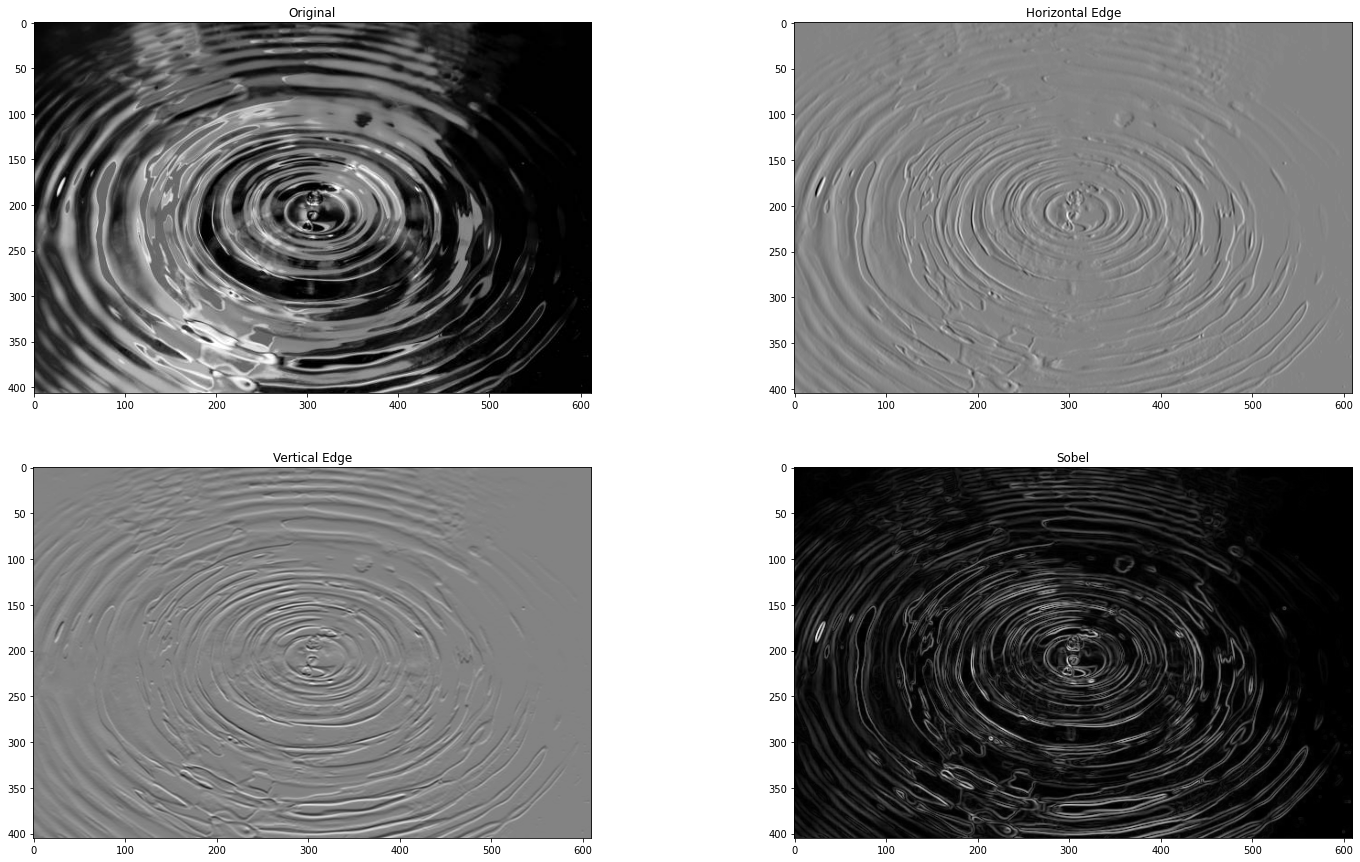

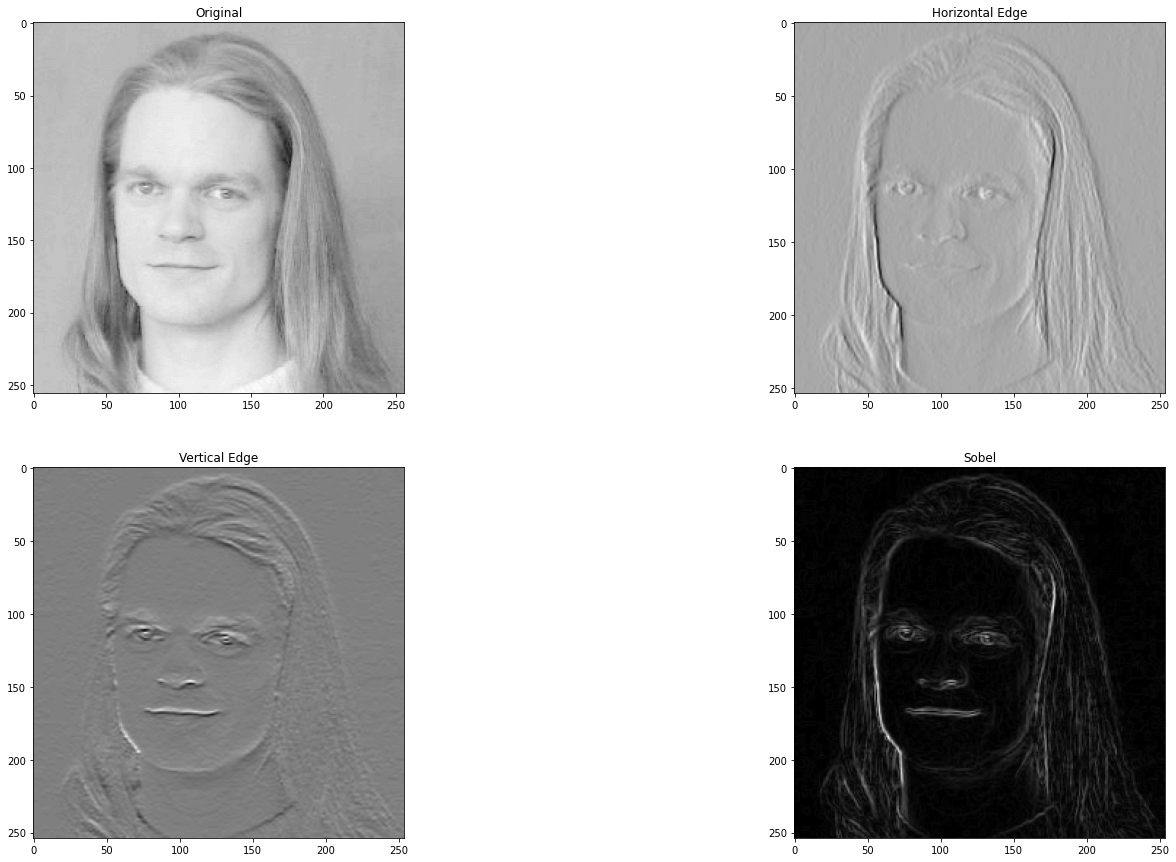

In [11]:
for img in images:
    sobel_edge_detection_(img, verbose=True)

# Prewitt

In [12]:
def prewitt_edge_detection_(image, verbose=False):
    fig = plt.figure(figsize=(25, 15))

    ax0 = fig.add_subplot(2,2,1) 
    
    if verbose:
      ax0.imshow(image, cmap='gray')
      ax0.set_title("Original")

    mask_x = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    mask_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    new_image_x = convolve2d(image, mask_x) 
    ax1 = fig.add_subplot(2,2,2) 
    if verbose:
        ax1.imshow(new_image_x, cmap='gray')
        ax1.set_title("Horizontal Edge")
        
    new_image_y = convolve2d(image, mask_y) 
    ax2 = fig.add_subplot(2,2,3) 
    if verbose:
        ax2.imshow(new_image_y, cmap='gray')
        ax2.set_title("Vertical Edge")

    img_out = pl.sqrt(pl.square(new_image_x) + pl.square(new_image_y))
    img_out *= 255.0 / img_out.max()
    
    ax3 = fig.add_subplot(2,2,4) 
    if verbose:
        ax3.imshow(img_out, cmap='gray')
        ax3.set_title("Prewitt")
        plt.show()
    return img_out

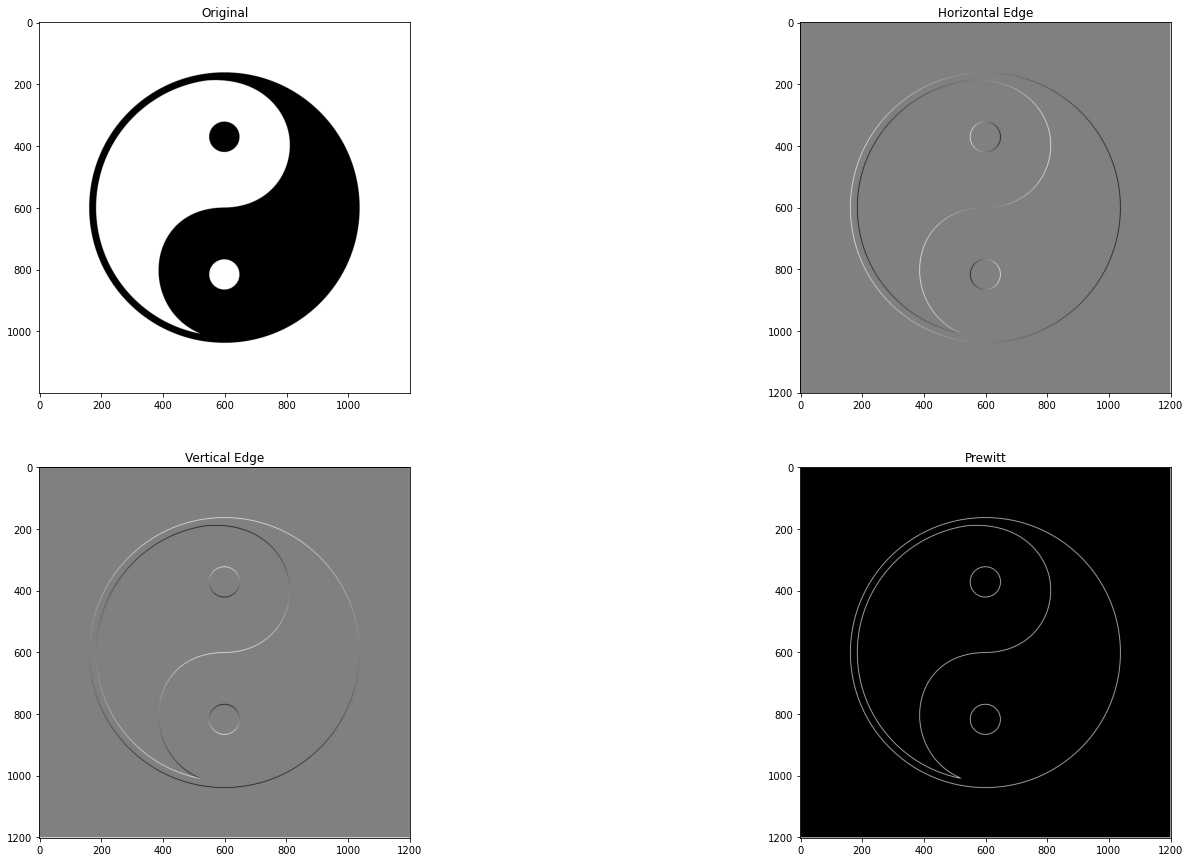

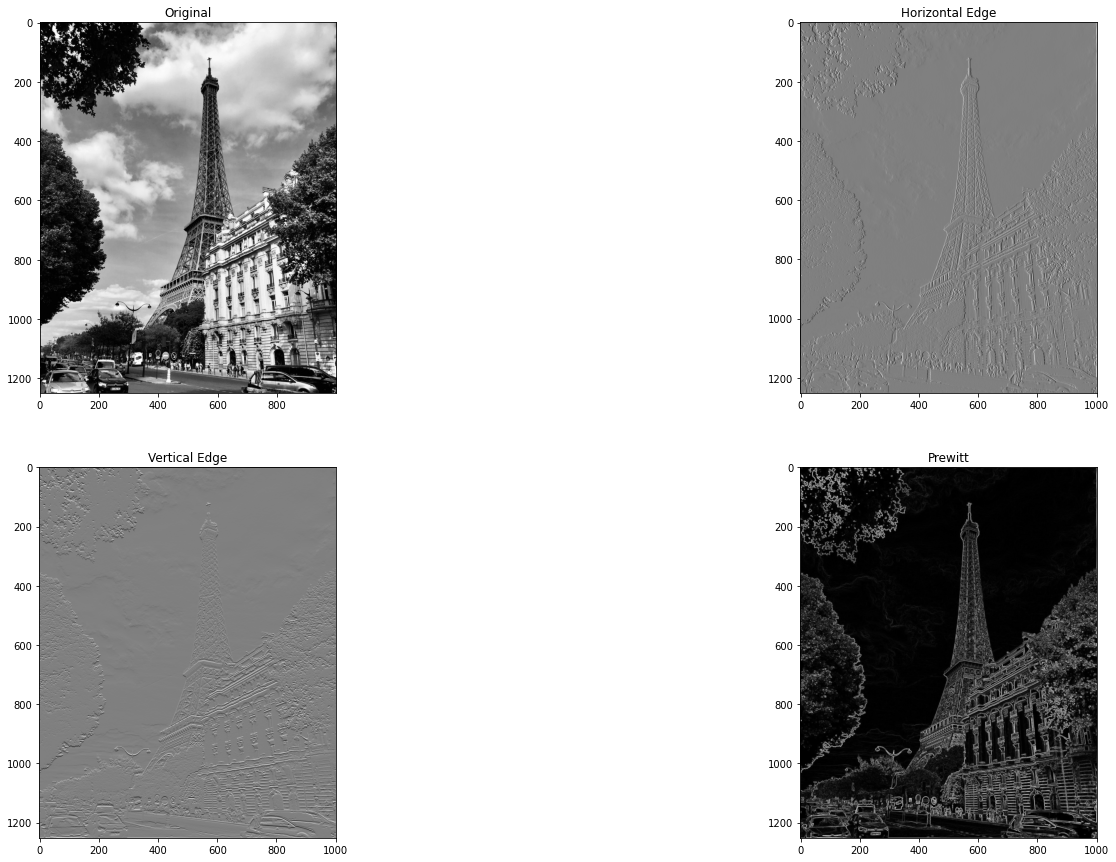

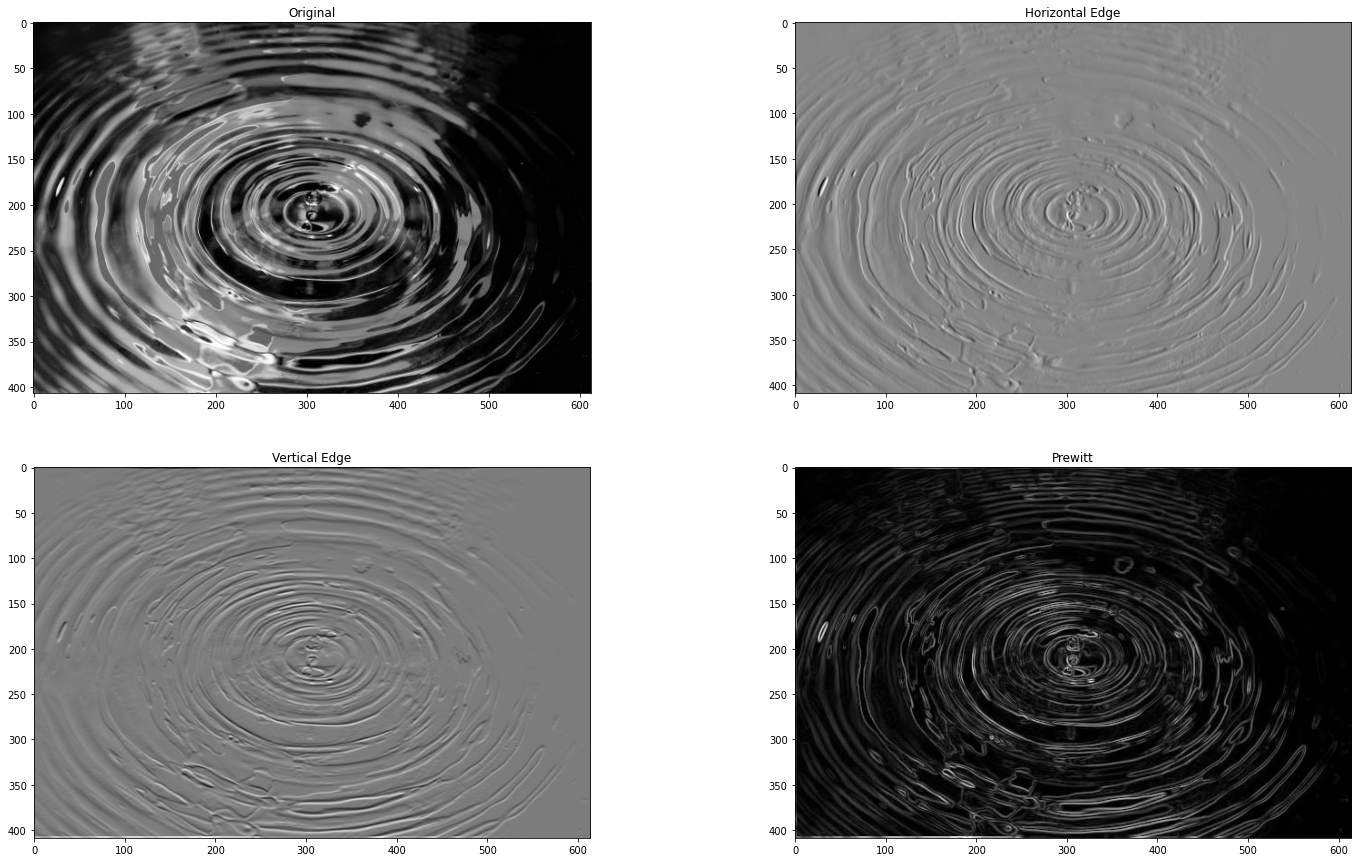

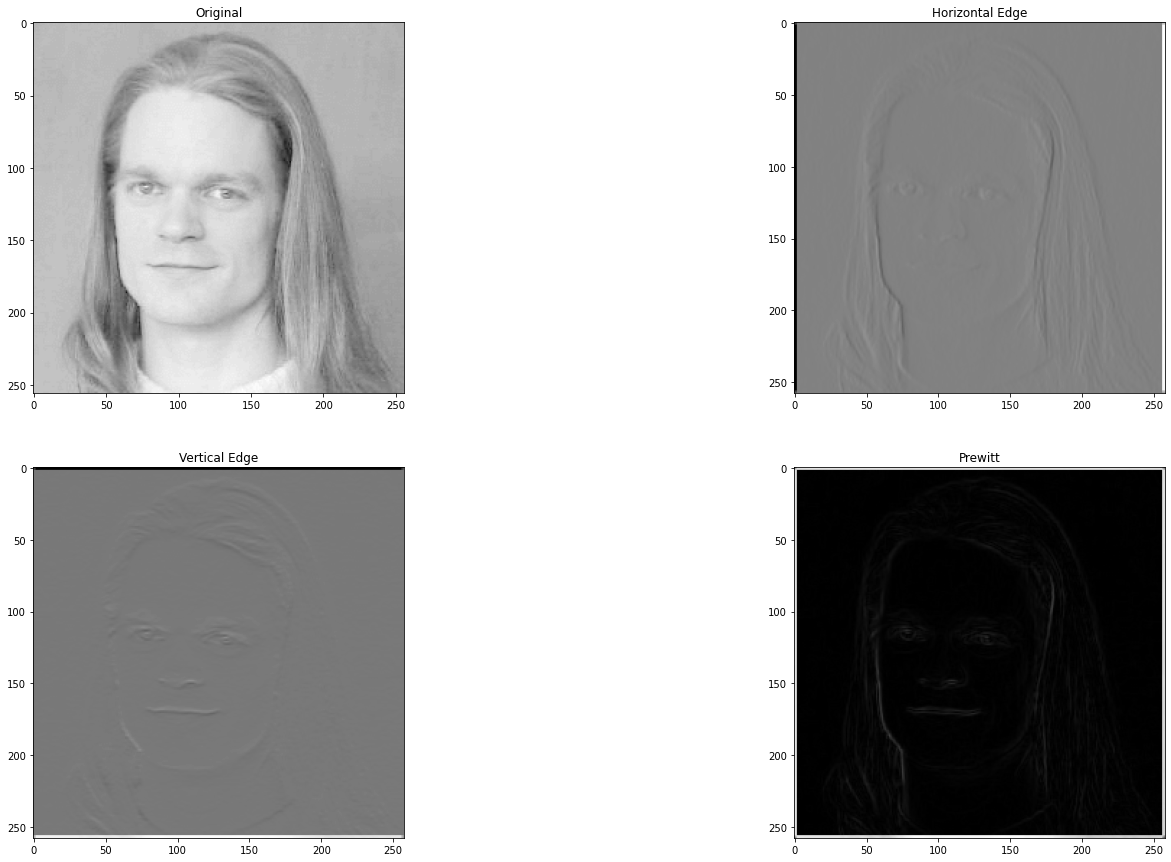

In [13]:
for img in images:
    prewitt_edge_detection_(img, verbose=True)